# S&P 500 Index: Cluster Analysis with Kmeans

In [1]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
import pandas as pd
import pandas_datareader as dr
from math import sqrt

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler


In [2]:
spx = pd.read_csv('SP500_companies_data.csv', header=0, index_col=0)

In [3]:
spx

,Returns,Volatility,Beta,Sharpe_Ratio,PE
ABT,0.203101,0.219387,0.675190,0.925767,34.078876
ABBV,0.220948,0.284533,NaN,0.776531,31.364618
ABMD,0.465194,0.470735,1.307399,0.988230,66.222670
ACN,0.217336,0.239580,1.091403,0.907153,35.498936
ATVI,0.259882,0.313745,0.601741,0.828323,28.250000
...,...,...,...,...,...
YUM,0.164267,0.253675,1.034782,0.647549,35.140410
ZBRA,0.296886,0.359616,1.585869,0.825566,46.306260
ZBH,0.147811,0.262520,1.349836,0.563045,59.948640
ZION,0.126530,0.333665,1.576630,0.379214,10.601748


In [4]:
spx = spx.dropna()

In [5]:
spx

,Returns,Volatility,Beta,Sharpe_Ratio,PE
ABT,0.203101,0.219387,0.675190,0.925767,34.078876
ABMD,0.465194,0.470735,1.307399,0.988230,66.222670
ACN,0.217336,0.239580,1.091403,0.907153,35.498936
ATVI,0.259882,0.313745,0.601741,0.828323,28.250000
ADBE,0.322720,0.295316,0.952665,1.092794,53.872090
...,...,...,...,...,...
YUM,0.164267,0.253675,1.034782,0.647549,35.140410
ZBRA,0.296886,0.359616,1.585869,0.825566,46.306260
ZBH,0.147811,0.262520,1.349836,0.563045,59.948640
ZION,0.126530,0.333665,1.576630,0.379214,10.601748


# 1. 2-D Cluster Analysis

In [6]:
spx_return_risk = spx.iloc[:,0:2]
spx_return_risk

,Returns,Volatility
ABT,0.203101,0.219387
ABMD,0.465194,0.470735
ACN,0.217336,0.239580
ATVI,0.259882,0.313745
ADBE,0.322720,0.295316
...,...,...
YUM,0.164267,0.253675
ZBRA,0.296886,0.359616
ZBH,0.147811,0.262520
ZION,0.126530,0.333665


Text(0.5, 1.0, 'Elbow curve')

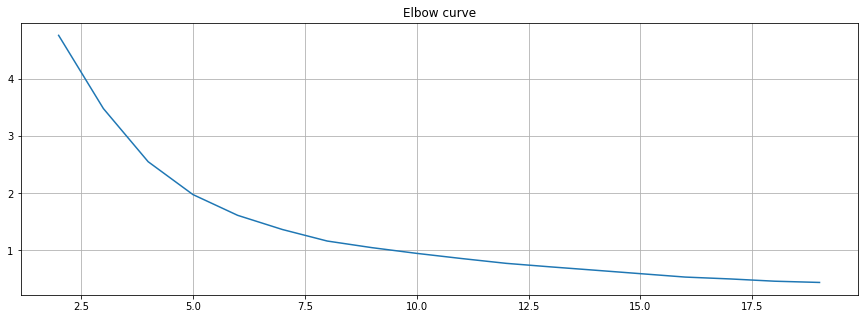

In [7]:
X0 = spx_return_risk
distorsions = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k, random_state=0)
    k_means.fit(X0)
    distorsions.append(k_means.inertia_)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

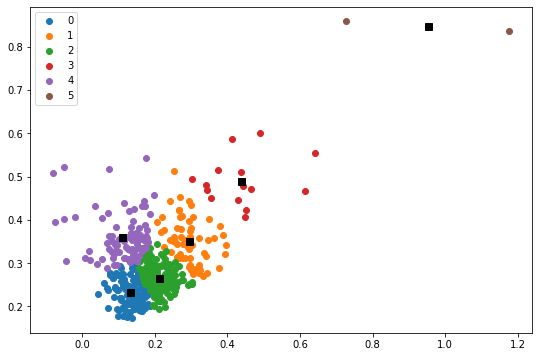

In [8]:
#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(X0['Returns']),np.asarray(X0['Volatility'])]).T

#predict the labels of clusters.
k_means = KMeans(n_clusters=6, random_state=0)
k_means.fit(data)
label = k_means.labels_
centroids = k_means.cluster_centers_ 

#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
fig = plt.figure(figsize=(9, 6))

for i in u_labels:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)   

plot(centroids[:,0],centroids[:,1],'sk',markersize=7)  
plt.legend()
plt.show()

In [9]:
#identify the outlier
print(X0.idxmax())

Returns       MRNA
Volatility    ENPH
dtype: object


In [10]:
#drop the relevant stock from our data
X0 = X0.drop('MRNA')
X0 = X0.drop('ENPH')
#recreate data to feed into the algorithm
data = np.asarray([np.asarray(X0['Returns']),np.asarray(X0['Volatility'])]).T

Text(0.5, 1.0, 'Elbow curve')

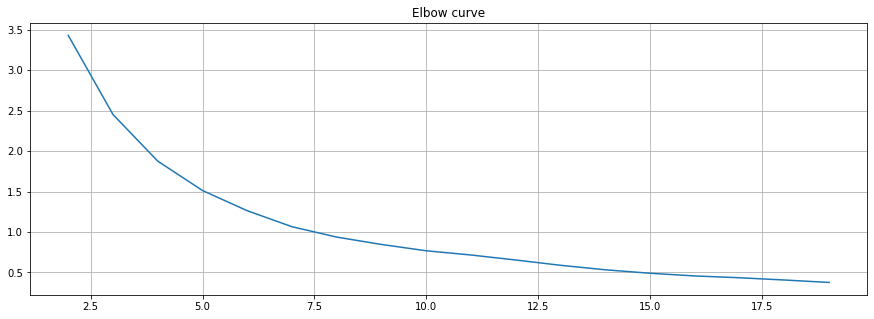

In [11]:
distorsions = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k, random_state=0)
    k_means.fit(X0)
    distorsions.append(k_means.inertia_)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

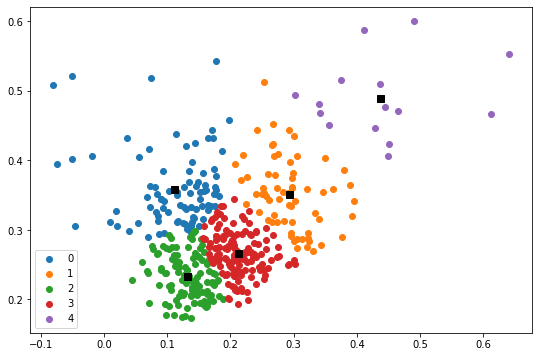

In [12]:
#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(X0['Returns']),np.asarray(X0['Volatility'])]).T

#predict the labels of clusters.
k_means = KMeans(n_clusters=5, random_state=0)
k_means.fit(data)
label = k_means.labels_
centroids = k_means.cluster_centers_ 

#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
fig = plt.figure(figsize=(9, 6))

for i in u_labels:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)   

plot(centroids[:,0],centroids[:,1],'sk',markersize=7)  
plt.legend()
plt.show()

### Cluster 0 is not attactive relative to the other clusters.  The stocks in Cluster 0 generally have relatively higher volatility (y-axis) but relatively lower return (x-axis). 

In [13]:
details = [(name,cluster) for name, cluster in zip(X0.index,label)]
for detail in details:
    print(detail)

('ABT', 3)
('ABMD', 4)
('ACN', 3)
('ATVI', 1)
('ADBE', 1)
('AMD', 4)
('AAP', 0)
('AFL', 2)
('A', 3)
('APD', 2)
('AKAM', 0)
('ALB', 0)
('ARE', 2)
('ALGN', 4)
('ALLE', 2)
('LNT', 2)
('ALL', 2)
('GOOGL', 3)
('GOOG', 3)
('MO', 2)
('AMZN', 1)
('AMCR', 2)
('AEE', 2)
('AEP', 2)
('AXP', 3)
('AMT', 3)
('AWK', 3)
('AMP', 3)
('AME', 3)
('AMGN', 3)
('APH', 3)
('ADI', 3)
('ANSS', 3)
('ANTM', 3)
('AOS', 3)
('APA', 0)
('AAPL', 1)
('AMAT', 1)
('APTV', 1)
('ADM', 2)
('ANET', 4)
('AJG', 3)
('AIZ', 3)
('ATO', 2)
('ADSK', 1)
('ADP', 3)
('AZO', 2)
('AVB', 2)
('AVY', 3)
('BLL', 3)
('BAC', 0)
('BK', 2)
('BAX', 2)
('BDX', 2)
('BBY', 1)
('BIO', 3)
('BIIB', 1)
('BLK', 3)
('BKNG', 3)
('BWA', 0)
('BSX', 3)
('AVGO', 1)
('BR', 3)
('CHRW', 2)
('COG', 0)
('CDNS', 1)
('CPB', 2)
('COF', 0)
('CAH', 2)
('KMX', 0)
('CTLT', 1)
('CAT', 2)
('CBOE', 3)
('CBRE', 0)
('CDW', 1)
('CE', 3)
('CNC', 1)
('CNP', 2)
('CF', 0)
('CRL', 3)
('SCHW', 3)
('CHTR', 1)
('CMG', 1)
('CB', 2)
('CHD', 3)
('CI', 3)
('CINF', 3)
('CTAS', 3)
('CSCO', 2

# 2. Multi-dimensional Cluster Analysis

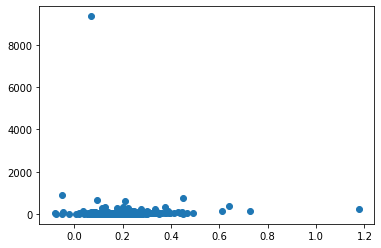

In [14]:
plt.scatter(spx['Returns'], spx['PE']) 

In [15]:
#identify the outlier
print(spx['PE'].idxmax())

COP


In [16]:
spx = spx.drop('COP')

In [17]:
spx

,Returns,Volatility,Beta,Sharpe_Ratio,PE
ABT,0.203101,0.219387,0.675190,0.925767,34.078876
ABMD,0.465194,0.470735,1.307399,0.988230,66.222670
ACN,0.217336,0.239580,1.091403,0.907153,35.498936
ATVI,0.259882,0.313745,0.601741,0.828323,28.250000
ADBE,0.322720,0.295316,0.952665,1.092794,53.872090
...,...,...,...,...,...
YUM,0.164267,0.253675,1.034782,0.647549,35.140410
ZBRA,0.296886,0.359616,1.585869,0.825566,46.306260
ZBH,0.147811,0.262520,1.349836,0.563045,59.948640
ZION,0.126530,0.333665,1.576630,0.379214,10.601748


In [18]:
scaler = StandardScaler()
spx_tr = scaler.fit_transform(spx)

Text(0.5, 1.0, 'Elbow curve')

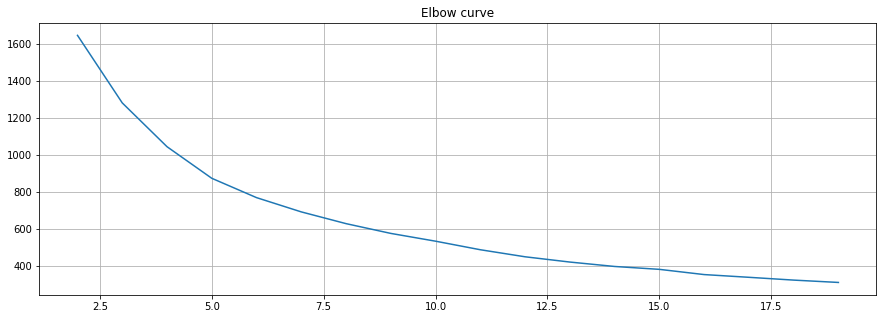

In [19]:
X = spx_tr
distorsions = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k, random_state=0)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

In [20]:
#predict the labels of clusters.
k_means = KMeans(n_clusters=6, random_state=0)
k_means.fit(spx_tr)
label = k_means.labels_
centroids = k_means.cluster_centers_ 

#Getting unique labels
u_labels = np.unique(label)

In [21]:
centroids

array([[-0.45451296, -0.6764272 , -0.70884444, -0.18190559, -0.16514147],
       [-0.71016204,  0.4452989 ,  0.78943318, -1.10990926, -0.27049413],
       [ 6.24288937,  5.34385643,  0.97784522,  1.79939666,  2.42391874],
       [ 0.51854982, -0.34640958, -0.28737826,  0.97862312,  0.01161838],
       [ 1.11233856,  1.36187926,  0.70846965,  0.35750467,  0.19140106],
       [-0.17634913,  1.05205856,  2.37459555, -0.48156578,  8.28356615]])

In [22]:
df_centroids=pd.DataFrame(centroids,columns=['Returns','Volatility','Beta','Sharpe_Ratio','PE'])
df_centroids['Cluster']=df_centroids.index
df_centroids

,Returns,Volatility,Beta,Sharpe_Ratio,PE,Cluster
0,-0.454513,-0.676427,-0.708844,-0.181906,-0.165141,0
1,-0.710162,0.445299,0.789433,-1.109909,-0.270494,1
2,6.242889,5.343856,0.977845,1.799397,2.423919,2
3,0.518550,-0.346410,-0.287378,0.978623,0.011618,3
4,1.112339,1.361879,0.708470,0.357505,0.191401,4
5,-0.176349,1.052059,2.374596,-0.481566,8.283566,5


<AxesSubplot:>

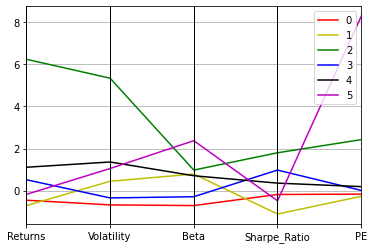

In [23]:
pd.plotting.parallel_coordinates(df_centroids,'Cluster', color=('r', 'y', 'g', 'b','k','m'))


### Cluster 5 is not attactive relative to the other clusters.  On average, the stocks in Cluster 5 have relatively higher total risk (Volatility) and market risk (Beta), but relatively lower total return (Returns) and risk-adjusted return (Sharpe Ratio).  In addition, Cluster 5 is expensive in terms of valuation (highest PE ratio).

###  Although Cluster 2 has the highest average total return (Returns) and risk-adjusted return (Sharpe Ratio), it also has the highest total risk (Volatility) and the second highest market risk (Beta).  It is also expensive with high PE ratio.

### Cluster 3 has reasonably high average risk-adjusted return (Sharpe Ratio) and attractive valuation (low PE ratio).  It average total risk (Volatility) and market risk (Beta) are also comparably low.

In [24]:
details = [(name,cluster) for name, cluster in zip(spx.index,label)]
for detail in details:
    print(detail)

('ABT', 3)
('ABMD', 4)
('ACN', 3)
('ATVI', 3)
('ADBE', 3)
('AMD', 4)
('AAP', 1)
('AFL', 0)
('A', 0)
('APD', 0)
('AKAM', 0)
('ALB', 1)
('ARE', 0)
('ALGN', 4)
('ALLE', 0)
('LNT', 0)
('ALL', 0)
('GOOGL', 3)
('GOOG', 3)
('MO', 0)
('AMZN', 3)
('AMCR', 0)
('AEE', 0)
('AEP', 0)
('AXP', 1)
('AMT', 0)
('AWK', 3)
('AMP', 1)
('AME', 3)
('AMGN', 0)
('APH', 3)
('ADI', 3)
('ANSS', 3)
('ANTM', 3)
('AOS', 3)
('APA', 5)
('AAPL', 3)
('AMAT', 4)
('APTV', 4)
('ADM', 0)
('ANET', 4)
('AJG', 3)
('AIZ', 0)
('ATO', 0)
('ADSK', 4)
('ADP', 3)
('AZO', 0)
('AVB', 0)
('AVY', 0)
('BLL', 3)
('BAC', 1)
('BK', 1)
('BAX', 0)
('BDX', 0)
('BBY', 4)
('BIO', 3)
('BIIB', 0)
('BLK', 3)
('BKNG', 3)
('BWA', 1)
('BSX', 3)
('AVGO', 3)
('BR', 3)
('CHRW', 0)
('COG', 0)
('CDNS', 3)
('CPB', 0)
('COF', 1)
('CAH', 1)
('KMX', 1)
('CTLT', 4)
('CAT', 0)
('CBOE', 0)
('CBRE', 1)
('CDW', 3)
('CE', 1)
('CNC', 3)
('CNP', 0)
('CF', 1)
('CRL', 3)
('SCHW', 1)
('CHTR', 3)
('CMG', 4)
('CB', 0)
('CHD', 3)
('CI', 3)
('CINF', 0)
('CTAS', 3)
('CSCO', 0

In [25]:
spx['Cluster'] = label

In [26]:
spx

,Returns,Volatility,Beta,Sharpe_Ratio,PE,Cluster
ABT,0.203101,0.219387,0.675190,0.925767,34.078876,3
ABMD,0.465194,0.470735,1.307399,0.988230,66.222670,4
ACN,0.217336,0.239580,1.091403,0.907153,35.498936,3
ATVI,0.259882,0.313745,0.601741,0.828323,28.250000,3
ADBE,0.322720,0.295316,0.952665,1.092794,53.872090,3
...,...,...,...,...,...,...
YUM,0.164267,0.253675,1.034782,0.647549,35.140410,0
ZBRA,0.296886,0.359616,1.585869,0.825566,46.306260,4
ZBH,0.147811,0.262520,1.349836,0.563045,59.948640,1
ZION,0.126530,0.333665,1.576630,0.379214,10.601748,1


In [27]:
for i in u_labels:
    print('Cluster',i,':',(spx['Cluster']==i).sum())


Cluster 0 : 135
Cluster 1 : 107
Cluster 2 : 3
Cluster 3 : 125
Cluster 4 : 49
Cluster 5 : 4


In [28]:
spx.loc[spx['Cluster']==5]

,Returns,Volatility,Beta,Sharpe_Ratio,PE,Cluster
APA,-0.051338,0.522102,4.928726,-0.098330,892.85720,5
EOG,0.093220,0.384324,2.161588,0.242555,674.62964,5
FIS,0.208126,0.240924,0.854347,0.863868,596.20000,5
NOW,0.448877,0.407016,0.934782,1.102848,773.53950,5


In [29]:
spx.loc[spx['Cluster']==2]

,Returns,Volatility,Beta,Sharpe_Ratio,PE,Cluster
ENPH,0.727811,0.858094,1.144178,0.848171,149.17387,2
MRNA,1.177321,0.836265,1.470843,1.407833,236.99733,2
TSLA,0.641748,0.553537,1.987486,1.159358,362.25620,2


In [30]:
spx.loc[spx['Cluster']==3]

,Returns,Volatility,Beta,Sharpe_Ratio,PE,Cluster
ABT,0.203101,0.219387,0.675190,0.925767,34.078876,3
ACN,0.217336,0.239580,1.091403,0.907153,35.498936,3
ATVI,0.259882,0.313745,0.601741,0.828323,28.250000,3
ADBE,0.322720,0.295316,0.952665,1.092794,53.872090,3
GOOGL,0.210649,0.257453,1.010881,0.818203,29.228960,3
...,...,...,...,...,...,...
V,0.290724,0.249965,0.996195,1.163062,50.928070,3
WST,0.302804,0.251467,0.986942,1.204151,60.150480,3
XLNX,0.229086,0.309877,1.005978,0.739280,57.190840,3
XYL,0.205124,0.264334,1.023369,0.776001,75.359280,3
